<a href="https://colab.research.google.com/github/miftakhulfiroh/PROYEK-ANALISIS-DATA/blob/main/PROYEK_ANALISIS_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pipreqs

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pipreqs "/content/drive/MyDrive/Proyek Analisis Data " --scan-notebooks

# Proyek Analisis Data:
- **Nama:** Miftakhul Ma'firoh
- **Email:** miftakhulfiroh@gmail.com
- **ID Dicoding:** Miftakhul Ma'firoh

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dan PM10 di Stasiun Changping tahun 2013 - 2017?
- Bagaimana model prediksi tingkat polusi udara berdasarkan data historis dan faktor meteorologi?


## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
#Membaca dataset dari file csv
#Mencari jumlah kolom dan baris dari dataset

airquality_df = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
airquality_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


**Insight:**

Dataset di atas merupakan data yang digunakan untuk mengukur kualitas udara di Stasiun Changping, Beijing pada tahun 2013 hingga tahun 2017. Dataset di atas terdiri dari 35064 baris dan 18 kolom.
- No
- Year: Menunjukkan tahun pengukuran kualitas udara
- Month: Menunjukkan bulan pengukuran kualitas udara
- Day: Menunjukkan hari pengukuran kualitas udara
- Hour: Menunjukkan jam pengukuran kualitas udara
- PM2.5: Partikel udara yang berukuran diameter 2.5 mikrometer
- PM10: Partikel udara yang berukuran diameter 10 mikrometer
- SO2: Gas sulfur dioksida
- NO2: Gas nitrogen dioksida
- CO: Gas karbon monoksida
- O3: Gas ozon
- TEMP: Suhu udara
- PRES: Tekanan udara
- DEWP: Titik embun
- RAIN: Curah hujan
- wd: Arah angin
- WSPM: Kecepatan angin
- station: Menunjukkan lokasi pengambilan data


### Assessing Data

In [11]:
#Memeriksa Tipe Data dan Missing Values

airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**

Dari 18 kolom dataset diatas, tidak ada masalah dengan tipe data namun terdapat missing values pada kolom (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN).

In [12]:
#Mencari Informasi Jumlah Missing Values pada Setiap Kolom

airquality_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


**Insight:**

Jumlah missing values pada setiap kolom adalah sebagai berikut:

- Pada kolom PM2.5 terdapat missing values sebanyak 774
- Pada kolom PM10 terdapat missing values sebanyak	582
- Pada kolom SO2 terdapat missing values sebanyak	628
- Pada kolom NO2 terdapat missing values sebanyak	667
- Pada kolom CO terdapat missing values sebanyak	1521
- Pada kolom O3 terdapat missing values sebanyak	604
- Pada kolom TEMP terdapat missing values sebanyak	53
- Pada kolom PRES terdapat missing values sebanyak	50
- Pada kolom DEWP terdapat missing values sebanyak	53
- Pada kolom RAIN terdapat missing values sebanyak	51
- Pada kolom wd terdapat missing values sebanyak	140
- Pada kolom WSPM terdapat missing values sebanyak	43

Berdasarkan informasi tersebut, untuk menghilangkan missing values dari tiap kolom maka perlu ditangani saat di tahap cleaning data.

In [13]:
#Mencari informasi jumlah duplikasi data

print("Jumlah duplikasi: ", airquality_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

Tidak terdapat data yang terduplikasi.

In [14]:
#Mencari informasi apakah terdapat inaccurate value atau tidak?

airquality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**

Bila diperhatikan dari hasil parameter statistik terdapat keanehan pada nilai maksimum yang terdapat pada kolom PM2.5, PM10, SO2, NO2, CO, 03, dan RAIN. Hal tersebut kemungkinan besar terdapat outliers pada kolom-kolom tersebut.

### Cleaning Data

In [15]:
# Mengubah nama kolom
airquality_df = airquality_df.rename(columns={'PM2.5': 'PM25'})

# Menampilkan DataFrame yang telah diubah
print(airquality_df)

          No  year  month  day  hour  PM25  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0   3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1   3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2   3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3   3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4   3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...   ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19  28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20  12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21   7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22  11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23  20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      -2.3  1020.8

In [16]:
#Menghapus Missing Values

mean_PM25 = airquality_df['PM25'].mean()
airquality_df.fillna({'PM25': mean_PM25}, inplace=True)

mean_PM10 = airquality_df['PM10'].mean()
airquality_df.fillna({'PM10': mean_PM10}, inplace=True)

mean_SO2 = airquality_df['SO2'].mean()
airquality_df.fillna({'SO2': mean_SO2}, inplace=True)

mean_NO2 = airquality_df['NO2'].mean()
airquality_df.fillna({'NO2': mean_NO2}, inplace=True)

mean_CO = airquality_df['CO'].mean()
airquality_df.fillna({'CO': mean_CO}, inplace=True)

mean_O3 = airquality_df['O3'].mean()
airquality_df.fillna({'O3': mean_O3}, inplace=True)

mean_TEMP = airquality_df['TEMP'].mean()
airquality_df.fillna({'TEMP': mean_TEMP}, inplace=True)

mean_PRES = airquality_df['PRES'].mean()
airquality_df.fillna({'PRES': mean_PRES}, inplace=True)

mean_DEWP = airquality_df['DEWP'].mean()
airquality_df.fillna({'DEWP': mean_DEWP}, inplace=True)

mean_RAIN = airquality_df['RAIN'].mean()
airquality_df.fillna({'RAIN': mean_RAIN}, inplace=True)

wd_mode = airquality_df['wd'].mode()[0]
airquality_df.fillna({'wd': wd_mode}, inplace=True)

mean_WSPM = airquality_df['WSPM'].mean()
airquality_df.fillna({'WSPM': mean_WSPM}, inplace=True)

print(airquality_df)

          No  year  month  day  hour  PM25  PM10   SO2   NO2     CO  \
0          1  2013      3    1     0   3.0   6.0  13.0   7.0  300.0   
1          2  2013      3    1     1   3.0   3.0   6.0   6.0  300.0   
2          3  2013      3    1     2   3.0   3.0  22.0  13.0  400.0   
3          4  2013      3    1     3   3.0   6.0  12.0   8.0  300.0   
4          5  2013      3    1     4   3.0   3.0  14.0   8.0  300.0   
...      ...   ...    ...  ...   ...   ...   ...   ...   ...    ...   
35059  35060  2017      2   28    19  28.0  47.0   4.0  14.0  300.0   
35060  35061  2017      2   28    20  12.0  12.0   3.0  23.0  500.0   
35061  35062  2017      2   28    21   7.0  23.0   5.0  17.0  500.0   
35062  35063  2017      2   28    22  11.0  20.0   3.0  15.0  500.0   
35063  35064  2017      2   28    23  20.0  25.0   6.0  28.0  900.0   

              O3  TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      85.000000  -2.3  1020.8 -19.7   0.0    E   0.5  Changping  
1      85.000

In [17]:
print(airquality_df.isnull().sum().sort_values(ascending=False))

No         0
year       0
WSPM       0
wd         0
RAIN       0
DEWP       0
PRES       0
TEMP       0
O3         0
CO         0
NO2        0
SO2        0
PM10       0
PM25       0
hour       0
day        0
month      0
station    0
dtype: int64


In [18]:
airquality_df.head()

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [19]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM25     35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**

Pada tahap cleaning data, missing values yang terdapat pada kolom sebagai berikut:

- Pada kolom PM2.5 terdapat missing values sebanyak 774, berhasil dihapus sehingga tidak missing values.
- Pada kolom PM10 terdapat missing values sebanyak	582, berhasil dihapus sehingga tidak missing values.
- Pada kolom SO2 terdapat missing values sebanyak	628, berhasil dihapus sehingga tidak missing values.
- Pada kolom NO2 terdapat missing values sebanyak	667, berhasil dihapus sehingga tidak missing values.
- Pada kolom CO terdapat missing values sebanyak	1521, berhasil dihapus sehingga tidak missing values.
- Pada kolom O3 terdapat missing values sebanyak	604, berhasil dihapus sehingga tidak missing values.
- Pada kolom TEMP terdapat missing values sebanyak	53, berhasil dihapus sehingga tidak missing values.
- Pada kolom PRES terdapat missing values sebanyak	50, berhasil dihapus sehingga tidak missing values.
- Pada kolom DEWP terdapat missing values sebanyak	53, berhasil dihapus sehingga tidak missing values.
- Pada kolom RAIN terdapat missing values sebanyak	51, berhasil dihapus sehingga tidak missing values.
- Pada kolom wd terdapat missing values sebanyak	140, berhasil dihapus sehingga tidak missing values.
- Pada kolom WSPM terdapat missing values sebanyak	43, berhasil dihapus sehingga tidak missing values.



## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
airquality_df.describe()

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,1.309005
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


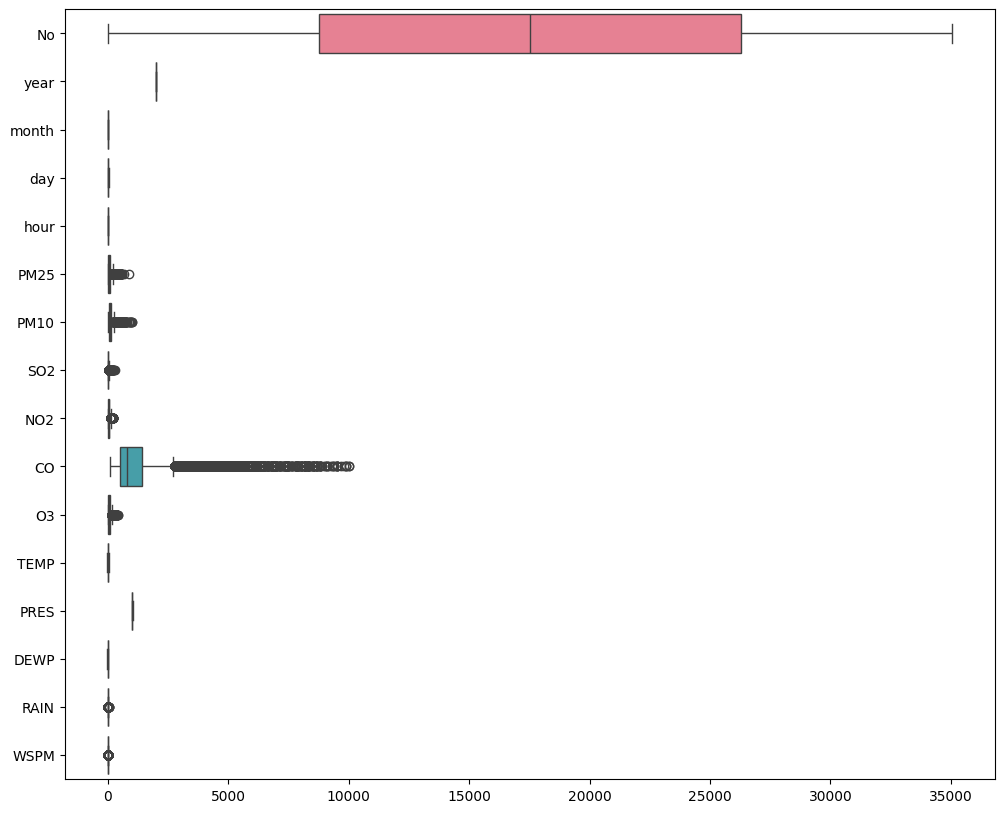

In [21]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=airquality_df, orient="h")
plt.show()

In [22]:
def remove_outliers(airquality_df, atribut, threshold=1.5):

    q1 = airquality_df[atribut].quantile(0.25)
    q3 = airquality_df[atribut].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)

    data_no_outliers = airquality_df[(airquality_df[atribut] >= lower_bound) & (airquality_df[atribut] <= upper_bound)]

    return data_no_outliers

airquality_df = remove_outliers(airquality_df, 'PM25')
airquality_df = remove_outliers(airquality_df, 'PM10')
airquality_df = remove_outliers(airquality_df, 'SO2')
airquality_df = remove_outliers(airquality_df, 'NO2')
airquality_df = remove_outliers(airquality_df, 'CO')
airquality_df = remove_outliers(airquality_df, 'O3')
airquality_df = remove_outliers(airquality_df, 'TEMP')
airquality_df = remove_outliers(airquality_df, 'PRES')

In [23]:
# Convert relevant columns to numeric type
for col in ['PM25', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    airquality_df[col] = pd.to_numeric(airquality_df[col], errors='coerce')

# Now, recalculate quantiles for only the numeric columns you're interested in
numeric_cols = ['PM25', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
q1 = airquality_df[numeric_cols].quantile(0.25)
q3 = airquality_df[numeric_cols].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define threshold
threshold = 1.5

# Detect and filter outliers
# Use .loc to ensure alignment and only filter on the numeric columns
outliers = airquality_df.loc[((airquality_df[numeric_cols] < (q1 - threshold * iqr)) | (airquality_df[numeric_cols] > (q3 + threshold * iqr))).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
          No  year  month  day  hour  PM25   PM10   SO2   NO2      CO    O3  \
19        20  2013      3    1    19   7.0   19.0  37.0  22.0   600.0  75.0   
21        22  2013      3    1    21   7.0   16.0  34.0  19.0   300.0  74.0   
29        30  2013      3    2     5  13.0   13.0  37.0  57.0   600.0  28.0   
43        44  2013      3    2    19  47.0   60.0  34.0  76.0  1000.0  18.0   
49        50  2013      3    3     1  50.0   60.0  36.0  73.0  1399.0   7.0   
...      ...   ...    ...  ...   ...   ...    ...   ...   ...     ...   ...   
34982  34983  2017      2   25    14  13.0   22.0   6.0  21.0   400.0  63.0   
34983  34984  2017      2   25    15   9.0   23.0   6.0  24.0   400.0  63.0   
35002  35003  2017      2   26    10  47.0  121.0  28.0  80.0  1700.0  20.0   
35003  35004  2017      2   26    11  69.0   72.0  29.0  83.0  1600.0  14.0   
35051  35052  2017      2   28    11   3.0   18.0   4.0  25.0   400.0  58.0   

       TEMP    PRES  DEWP  RAIN   wd  WSP

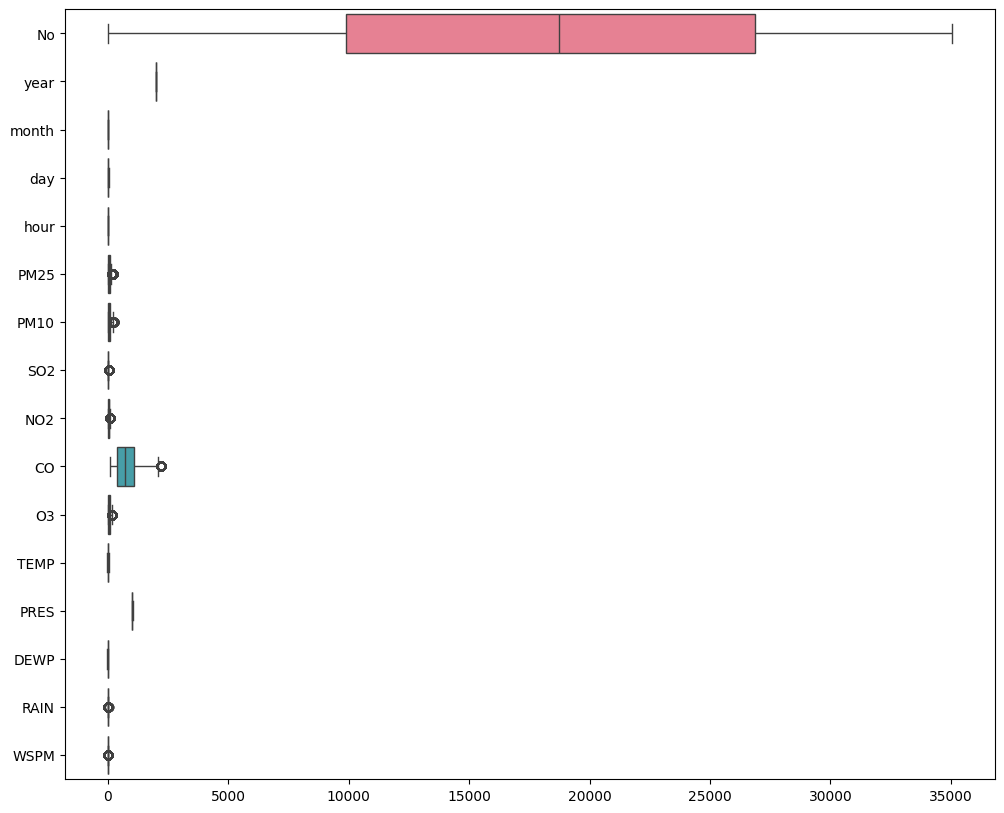

In [24]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=airquality_df, orient="h")
plt.show()

In [25]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26277 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       26277 non-null  int64  
 1   year     26277 non-null  int64  
 2   month    26277 non-null  int64  
 3   day      26277 non-null  int64  
 4   hour     26277 non-null  int64  
 5   PM25     26277 non-null  float64
 6   PM10     26277 non-null  float64
 7   SO2      26277 non-null  float64
 8   NO2      26277 non-null  float64
 9   CO       26277 non-null  float64
 10  O3       26277 non-null  float64
 11  TEMP     26277 non-null  float64
 12  PRES     26277 non-null  float64
 13  DEWP     26277 non-null  float64
 14  RAIN     26277 non-null  float64
 15  wd       26277 non-null  object 
 16  WSPM     26277 non-null  float64
 17  station  26277 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 3.8+ MB


In [26]:
airquality_df

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,57.940003,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [27]:
Korelasi = airquality_df[['PM25','PM10','SO2', 'NO2','CO','O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()
Korelasi

,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM25,1.000000,0.816331,0.224226,0.455914,0.679810,0.012085,0.151882,-0.183837,0.353547,-0.284513
PM10,0.816331,1.000000,0.267653,0.491426,0.564627,0.059480,0.136014,-0.171129,0.213268,-0.139900
SO2,0.224226,0.267653,1.000000,0.319111,0.348881,-0.129361,-0.313754,0.276202,-0.337832,0.014840
NO2,0.455914,0.491426,0.319111,1.000000,0.585644,-0.467189,-0.160712,0.117552,0.019026,-0.295494
CO,0.679810,0.564627,0.348881,0.585644,1.000000,-0.257534,-0.109374,0.054774,0.164746,-0.319509
O3,0.012085,0.059480,-0.129361,-0.467189,-0.257534,1.000000,0.519846,-0.406985,0.245431,0.180747
TEMP,0.151882,0.136014,-0.313754,-0.160712,-0.109374,0.519846,1.000000,-0.842380,0.816842,-0.147826
PRES,-0.183837,-0.171129,0.276202,0.117552,0.054774,-0.406985,-0.842380,1.000000,-0.765843,0.198352
DEWP,0.353547,0.213268,-0.337832,0.019026,0.164746,0.245431,0.816842,-0.765843,1.000000,-0.432357
WSPM,-0.284513,-0.139900,0.014840,-0.295494,-0.319509,0.180747,-0.147826,0.198352,-0.432357,1.000000


<Axes: >

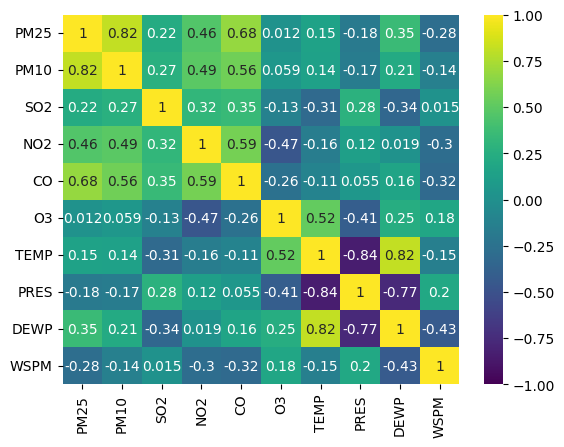

In [28]:
sns.heatmap(Korelasi, annot=True,cmap= "viridis", vmin=-1,vmax=1)

**Insight:**
- Pada tahapan Explanatory Analysis, Dataframe perlu diperiksa ada atau tidaknya outliers agar mudah untuk dianalisis.
- Setelah data bersih dari outliers, sehingga data mudah untuk dikorelasikan.
- Pada heatmap korelasi terdapat tiga nilai korelasi, yaitu:

  1) Nilai 1 yaitu nilai korelasi positif sempurna, hal ini menunjukkan adanya korelasi yang kuat.
  
  2) Nilai 0 yaitu tidak terdapat korelasi.

  3) Nilai 1 yaitu nilai korelasi negatif sempurna, hal ini menunjukkan adanya korelasi yang lemah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana tren konsentrasi PM2.5 dan PM10 di Stasiun Changping tahun 2013 - 2017?

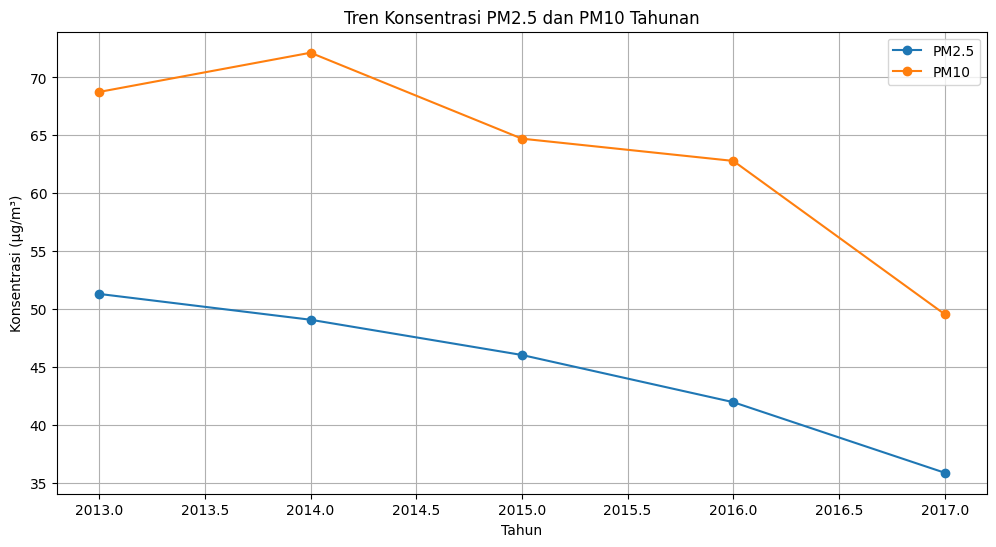

In [29]:
if airquality_df is not None:
    # Mengasumsikan data original, kolom tanggal are 'year', 'month', and 'day'
    airquality_df['Tanggal'] = pd.to_datetime(airquality_df[['year', 'month', 'day']])

    # 2. Ekstraksi Tahun
    airquality_df['Tahun'] = airquality_df['Tanggal'].dt.year

    # 3. Rata-rata Tahunan
    rata_tahunan = airquality_df.groupby('Tahun')[['PM25', 'PM10']].mean()

    # 4. Visualisasi Tren
    plt.figure(figsize=(12, 6))

    # Merubah 'PM2.5' menjadi 'PM25' untuk menyocokkan molom yang diganti namanya
    plt.plot(rata_tahunan.index, rata_tahunan['PM25'], marker='o', label='PM2.5')
    plt.plot(rata_tahunan.index, rata_tahunan['PM10'], marker='o', label='PM10')

    plt.title('Tren Konsentrasi PM2.5 dan PM10 Tahunan')
    plt.xlabel('Tahun')
    plt.ylabel('Konsentrasi (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Insight:**
- Grafik diatas menunjukkan bahwa tren PM2.5 dan PM10 dari tahun 2013 hingga 2017 mengalami penurunan.

### Pertanyaan 2:

- Bagaimana korelasi antara CO dengan PM2.5 dan PM10?

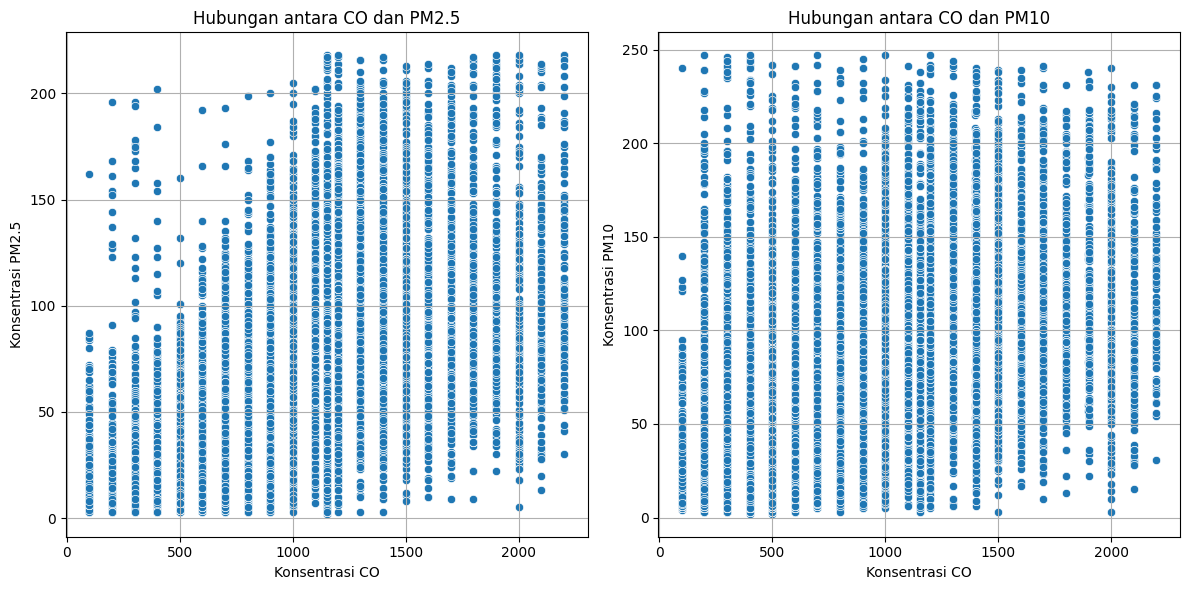

Korelasi antara CO dan PM2.5: 0.68
Korelasi antara CO dan PM10: 0.56


In [31]:
# Scatter Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

# Scatter plot untuk CO vs PM25
# Menggunakan 'PM25' untuk menyocokkan nama kolom yang telah diubah
sns.scatterplot(x='CO', y='PM25', data=airquality_df, ax=axes[0])
axes[0].title.set_text('Hubungan antara CO dan PM2.5')
axes[0].set_xlabel('Konsentrasi CO')
axes[0].set_ylabel('Konsentrasi PM2.5')
axes[0].grid(True)

# Scatter plot untuk CO vs PM10
sns.scatterplot(x='CO', y='PM10', data=airquality_df, ax=axes[1])
axes[1].title.set_text('Hubungan antara CO dan PM10')
axes[1].set_xlabel('Konsentrasi CO')
axes[1].set_ylabel('Konsentrasi PM10')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 2. Calculate Correlation
# Menggunakan 'PM25' untuk menyocokkan nama kolom yang telah diubah
correlation_co_pm25 = airquality_df['CO'].corr(airquality_df['PM25'])
correlation_co_pm10 = airquality_df['CO'].corr(airquality_df['PM10'])

print(f"Korelasi antara CO dan PM2.5: {correlation_co_pm25:.2f}")
print(f"Korelasi antara CO dan PM10: {correlation_co_pm10:.2f}")

**Insight:**

- Berdasarkan grafik scatter plot di atas, menentukan bahwa:
  
  1) Korelasi antara CO dengan PM2.5 ialah 0.68 yang menunjukkan bahwa terdapat korelasi positif yang cukup kuat.
  
  2) Korelasi antara CO dengan PM10 ialah 0.56 yang menunjukkan bahwa terdapat korelasi positif yang lemah. Sehingga korelasi antara CO dengan PM10 lebih lemah dari pada korelasi antara CO dengan PM2.5.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : tren konsentrasi PM2.5 dan PM10 di Stasiun Changping tahun 2013 - 2017 ialah mengalami penurunan secara signifikan.
- Conclution pertanyaan 2 :
  
  1) Korelasi antara CO dengan PM2.5 ialah 0.68 yang menunjukkan bahwa terdapat korelasi positif yang cukup kuat.
  
  2) Korelasi antara CO dengan PM10 ialah 0.56 yang menunjukkan bahwa terdapat korelasi positif yang lemah. Sehingga korelasi antara CO dengan PM10 lebih lemah dari pada korelasi antara CO dengan PM2.5.